In [1]:
#Some excercises with recognizing penguin species
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('penguins_size.csv')

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
len(df[(df['sex']!='FEMALE') & (df['sex']!='MALE')])

11

In [7]:
#Dropping rows with almost only NaN values
df=df.drop([339,3])

In [9]:
df[df['sex'].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


In [10]:
df[df['species']=='Adelie'].groupby('sex').describe().transpose()

sex                           FEMALE         MALE
culmen_length_mm  count    73.000000    73.000000
                  mean     37.257534    40.390411
                  std       2.028883     2.277131
                  min      32.100000    34.600000
                  25%      35.900000    39.000000
                  50%      37.000000    40.600000
                  75%      38.800000    41.500000
                  max      42.200000    46.000000
culmen_depth_mm   count    73.000000    73.000000
                  mean     17.621918    19.072603
                  std       0.942993     1.018886
                  min      15.500000    17.000000
                  25%      17.000000    18.500000
                  50%      17.600000    18.900000
                  75%      18.300000    19.600000
                  max      20.700000    21.500000
flipper_length_mm count    73.000000    73.000000
                  mean    187.794521   192.410959
                  std       5.595035     6.599317
                  min     172.000000   178.000000
                  25%     185.000000   189.000000
                  50%     188.000000   193.000000
                  75%     191.000000   197.000000
                  max     202.000000   210.000000
body_mass_g       count    73.000000    73.000000
                  mean   3368.835616  4043.493151
                  std     269.380102   346.811553
                  min    2850.000000  3325.000000
                  25%    3175.000000  3800.000000
                  50%    3400.000000  4000.000000
                  75%    3550.000000  4300.000000
                  max    3900.000000  4775.000000

In [11]:
                        #Dealing with Nan sex values by predicting them using SVM 
#Splitting data for sex predictions
df_sex = df[(df['sex']=='FEMALE') | (df['sex']=='MALE')]#Data for making predictions
end_sex=df[(df['sex']!='FEMALE') & (df['sex']!='MALE')].drop('sex',axis=1)#Those to predict

C:\Users\barto\AppData\Local\Temp\ipykernel_27600\4189024010.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_sex = df_sex[(df['species']=='Adelie') | (df['species']=='Gentoo')]


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


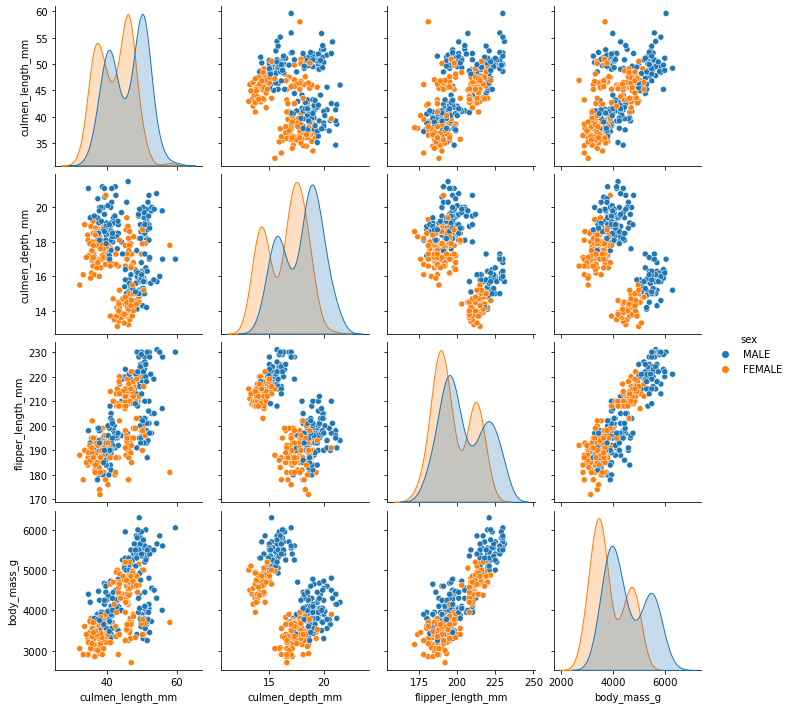

In [12]:
sns.pairplot(df_sex,hue='sex')
df_sex['species'].unique()
#Taking only Adelie and Gentoo, because those are only species with Nan sex values
df_sex = df_sex[(df['species']=='Adelie') | (df['species']=='Gentoo')]
df_sex

<AxesSubplot:>

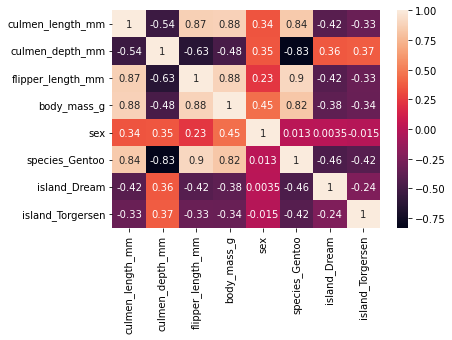

In [13]:
#Deal with categorical data
df_sex['sex']=df_sex['sex'].replace(['FEMALE','MALE'],[0,1])
df_sex = pd.get_dummies(df_sex,drop_first=True)
end_sex = pd.get_dummies(end_sex,drop_first=True)
sns.heatmap(df_sex.corr(),annot=True)

In [14]:
#Deal with unknown sex

X_sex = df_sex.drop('sex',axis=1)
y_sex = df_sex['sex']

from sklearn.model_selection import train_test_split
X_trains,X_tests,y_trains,y_tests = train_test_split(X_sex,y_sex,test_size=0.2)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_trains_scaled = scaler.fit_transform(X_trains)
X_tests_scaled = scaler.transform(X_tests)

#Basic svm implementation
from sklearn.svm import SVC
model_svc = SVC(kernel='rbf',gamma='auto',C=1)
model_svc.fit(X_trains_scaled,y_trains)
pred_sex = model_svc.predict(X_tests_scaled)

from sklearn.metrics import classification_report
print(classification_report(y_tests,pred_sex))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88        30
           1       0.81      0.91      0.86        23

    accuracy                           0.87        53
   macro avg       0.87      0.87      0.87        53
weighted avg       0.87      0.87      0.87        53



In [15]:
#Lets implement it on whole set
model_svc.fit(X_sex,y_sex)

SVC(C=1, gamma='auto')

In [16]:
#making final predictions
final_sex_pred = model_svc.predict(end_sex)

In [17]:
for i in range(len(list(final_sex_pred))):
    if list(final_sex_pred)[i] ==1:
        list(final_sex_pred)[i] = 'MALE'
    else:
        list(final_sex_pred)[i] = 'FEMALE'
list(final_sex_pred)

[1, 1, 0, 1, 1, 1, 0, 0, 1]

In [18]:
end_sex

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Gentoo,island_Dream,island_Torgersen
8,34.1,18.1,193.0,3475.0,0,0,1
9,42.0,20.2,190.0,4250.0,0,0,1
10,37.8,17.1,186.0,3300.0,0,0,1
11,37.8,17.3,180.0,3700.0,0,0,1
47,37.5,18.9,179.0,2975.0,0,1,0
246,44.5,14.3,216.0,4100.0,1,0,0
286,46.2,14.4,214.0,4650.0,1,0,0
324,47.3,13.8,216.0,4725.0,1,0,0
336,44.5,15.7,217.0,4875.0,1,0,0


In [19]:
df[df['sex'].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


In [20]:
#df['sex'].iloc[list(end_sex.index-1)] = list(final_sex_pred) It making changes only on copy of data that's why skipped

In [21]:
#Complete nan values with appropriate ones
for i in range(len(list(end_sex.index))):
    df.at[list(end_sex.index)[i],'sex'] =  list(final_sex_pred)[i]

In [22]:
df[(df['sex']==0)|(df['sex']==1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,1
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,1
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,0
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,1
47,Adelie,Dream,37.5,18.9,179.0,2975.0,1
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,1
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,0
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,0
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,1


In [23]:
def ex(a):
    if a == 0 or a=='FEMALE':
        a='FEMALE'
        return a
    elif a==1 or a=='MALE':
        a='MALE'
        return a  
df['sex']=df['sex'].apply(ex)

In [24]:
df
#Finally there is complete Data set to train tree model

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [25]:
#Some excercising with tree usage
X = df.drop('species',axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df['species']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

from sklearn.tree import DecisionTreeClassifier
#basic
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
pred = tree.predict(X_test)

In [30]:
print(classification_report(y_test,pred))
tree.feature_importances_

              precision    recall  f1-score   support

      Adelie       1.00      0.94      0.97        35
   Chinstrap       0.88      1.00      0.93        14
      Gentoo       1.00      1.00      1.00        20

    accuracy                           0.97        69
   macro avg       0.96      0.98      0.97        69
weighted avg       0.97      0.97      0.97        69



array([0.34816382, 0.07146379, 0.53516124, 0.00358339, 0.04162777,
       0.        , 0.        ])

In [37]:
from sklearn.tree import plot_tree
def test(model):
    model.fit(X_train,y_train)
    pred = tree.predict(X_test)
    print(classification_report(y_test,pred))
    plt.figure(dpi=200,figsize=(4,4))
    plot_tree(model,feature_names=X.columns,filled=True)
    
    

              precision    recall  f1-score   support

      Adelie       1.00      0.94      0.97        35
   Chinstrap       0.88      1.00      0.93        14
      Gentoo       1.00      1.00      1.00        20

    accuracy                           0.97        69
   macro avg       0.96      0.98      0.97        69
weighted avg       0.97      0.97      0.97        69



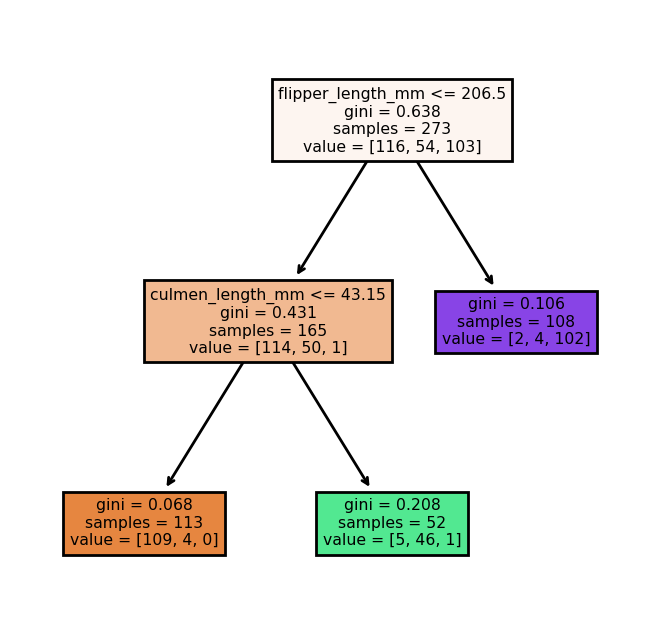

In [38]:
tree2 = DecisionTreeClassifier(max_depth=10,min_impurity_decrease=0.15,max_leaf_nodes=10)
test(tree2)

              precision    recall  f1-score   support

      Adelie       1.00      0.94      0.97        35
   Chinstrap       0.88      1.00      0.93        14
      Gentoo       1.00      1.00      1.00        20

    accuracy                           0.97        69
   macro avg       0.96      0.98      0.97        69
weighted avg       0.97      0.97      0.97        69



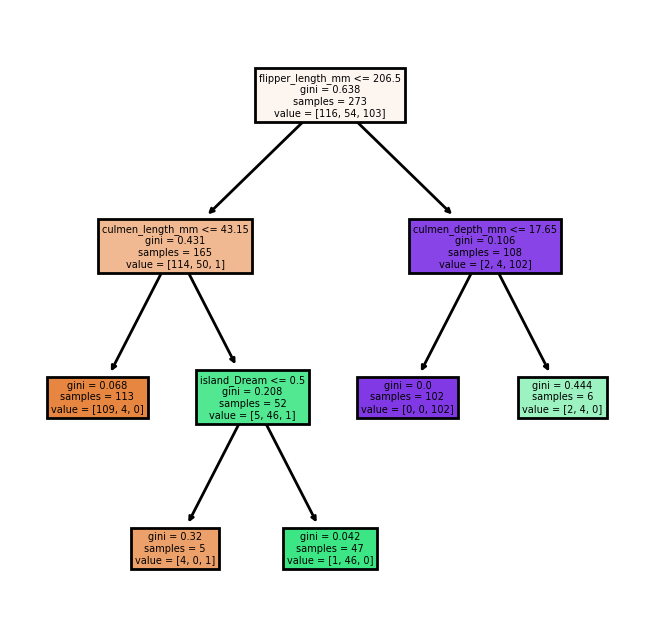

In [39]:
tree3= DecisionTreeClassifier(max_depth=10,min_impurity_decrease=0.02,max_leaf_nodes=10)
test(tree3)